In [1]:
import json
import numpy as np
import os
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [7]:
INPUT_ENTITY_TYPE = './data/3_openKE/synthesize/entity2id_objType.txt'
INPUT_EMBEDDING_PATH = './data/4_embedding/synthesize'

INPUT_RELATION_TYPE = './data/3_openKE/synthesize/relation2id_type.txt'
INPUT_RELATION_EMBEDDING_PATH = './data/4_embedding/synthesize/secureBERT/relation.npy'

In [3]:
def get_entity_labels():
    labels = list()
    with open(INPUT_ENTITY_TYPE) as f:
        for line in f.readlines()[1:]:
             dst_type, id = line.split('\t')
             labels.append(dst_type)
    return labels

def dimension_reduce(embeddings):
    embeddings = np.array(embeddings)
    print(embeddings.shape)
    pca = PCA(n_components=2)
    reduced_emb = pca.fit_transform(embeddings)
    print(reduced_emb.shape)
    return reduced_emb

def draw_ent_embedding(X, labels, model, dim, subplot=False):
    colors = {'process': 'red', 'file': 'green', 'network': 'blue', 'registry': 'purple'}
    markers = {'process': '+', 'file': 'x', 'network': '1', 'registry': '2'}
    x1 = X[:, 0]
    x2 = X[:, 1]
    print_cat = ['file','process','registry','network']
    if subplot:
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))
        for cat in print_cat:
            flags = [True if l == cat else False for l in labels]
            ax1.scatter(x1[flags], x2[flags], color=colors[cat], marker=markers[cat], label=f'{cat}({sum(flags)})')
            ax2.scatter(x1[flags], x2[flags], color=colors[cat], marker=markers[cat], label=f'{cat}({sum(flags)})')
        ax1.set_xlim([np.percentile(x1, 1),np.percentile(x1, 99)])
        ax1.set_ylim([np.percentile(x2, 1),np.percentile(x2, 99)])
        ax2.set_xlim([np.percentile(x1, 0),np.percentile(x1, 99.999)])
        ax2.set_ylim([np.percentile(x2, 0),np.percentile(x2, 99.999)])
        fig.tight_layout()
    else:
        fig, ax = plt.subplots(figsize=(10, 10))
        for cat in print_cat:
            flags = [True if l == cat else False for l in labels]
            ax.scatter(x1[flags], x2[flags], color=colors[cat], marker=markers[cat], label=f'{cat}({sum(flags)})')
        ax.set_xlim([np.percentile(x1, 0.001),np.percentile(x1, 99.999)])
        ax.set_ylim([np.percentile(x2, 0.001),np.percentile(x2, 99.999)])
        
    # Add a legend and labels
    plt.title(f'Entity Embedding({model}, dim={dim})')
    plt.legend()
    plt.xlabel(f'pca1')
    plt.ylabel(f'pca2')
    plt.show()
def draw_rel_embedding(X, y, model, dim):
    x1 = X[:, 0]
    x2 = X[:, 1]
    fig, ax = plt.subplots(figsize=(10, 10))
    print_cat = ['file','process','registry','network']
    for cat in print_cat:
        flags = [True if label_type[l] == cat else False for l in y]
        ax.scatter(x1[flags], x2[flags], color=colors[cat], label=f'{cat}({sum(flags)})')
    for i, txt in enumerate(y):
        ax.annotate(txt, (x1[i], x2[i]))
        
    plt.title(f'Relation Embedding({model}, dim={dim})')
    plt.legend()
    plt.xlabel(f'pca1')
    plt.ylabel(f'pca2')
    plt.show()

In [4]:
labels = get_entity_labels()

(1058479, 50)
(1058479, 2)


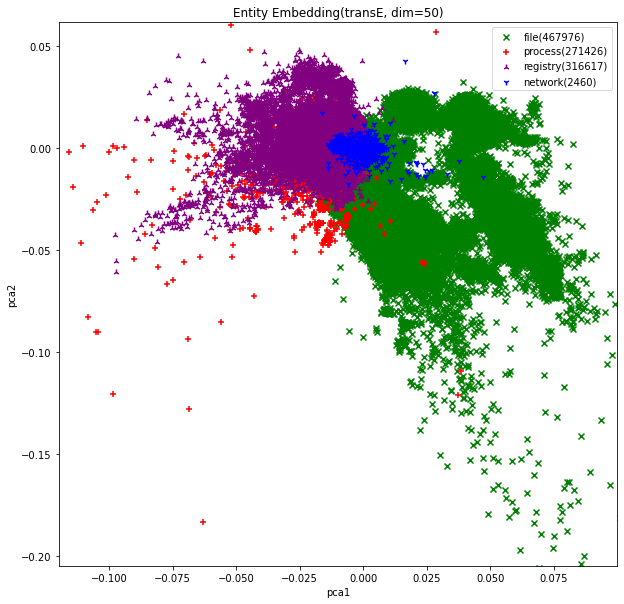

(1058479, 100)
(1058479, 2)


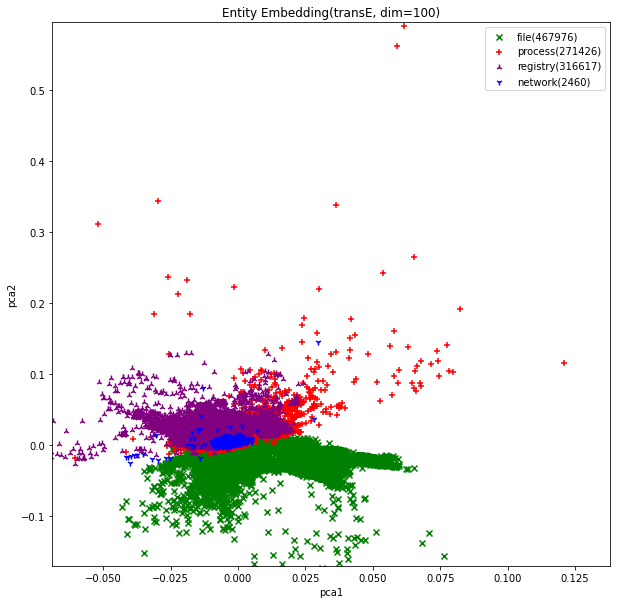

(1058479, 150)
(1058479, 2)


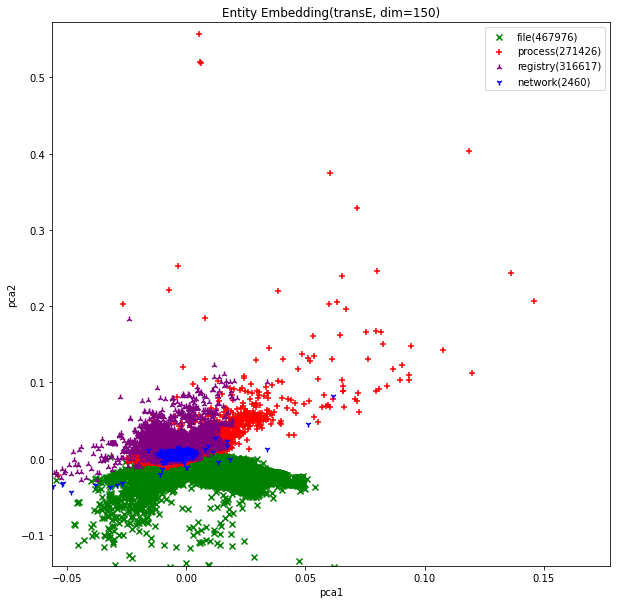

(1058479, 50)
(1058479, 2)


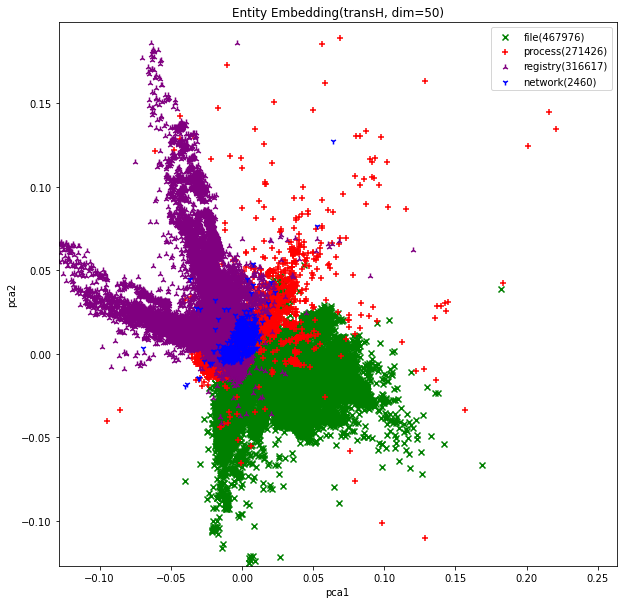

(1058479, 100)
(1058479, 2)


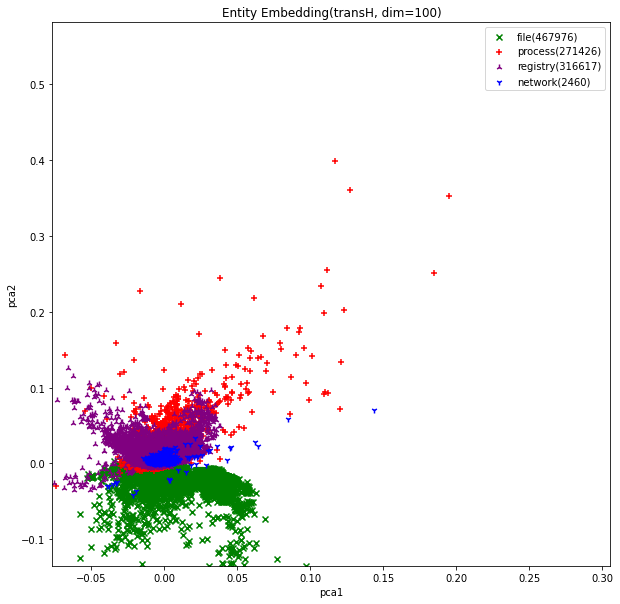

(1058479, 150)
(1058479, 2)


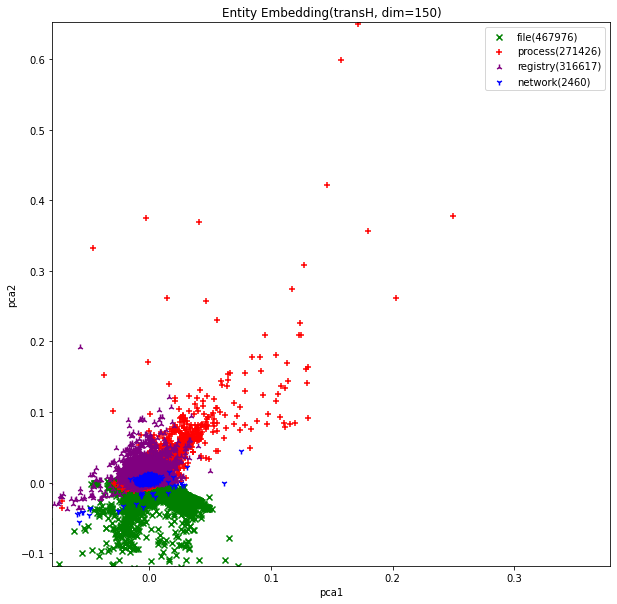

(1058479, 50)
(1058479, 2)


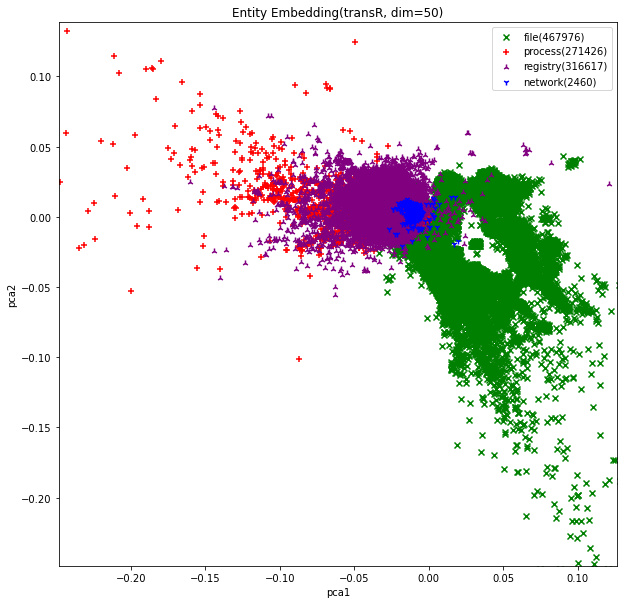

In [5]:
for MODEL_NAME in ['transE', 'transH', 'transR']:
    for DIM in [50, 100, 150]:
        if MODEL_NAME == 'transR' and DIM in [100, 150]:
            continue

        INPUT_EMBEDDING_NAME = f'{INPUT_EMBEDDING_PATH}/{MODEL_NAME}_{DIM}.vec.json'

        with open(INPUT_EMBEDDING_NAME) as f:
            data = json.load(f)
        reduced_embedding = dimension_reduce(data['ent_embeddings.weight'])
        draw_ent_embedding(reduced_embedding, labels, MODEL_NAME, DIM)

In [6]:
INPUT_EMBEDDING_NAME = f'{INPUT_EMBEDDING_PATH}/secureBERT'
MODEL_NAME = 'secureBERT'
DIM = 768

embeddings_chunk_0.npy (160000, 768)
embeddings_chunk_1.npy (320000, 768)
embeddings_chunk_2.npy (480000, 768)
embeddings_chunk_3.npy (640000, 768)
embeddings_chunk_4.npy (800000, 768)
embeddings_chunk_5.npy (960000, 768)
embeddings_chunk_6.npy (1058479, 768)
(1058479, 768)
(1058479, 2)


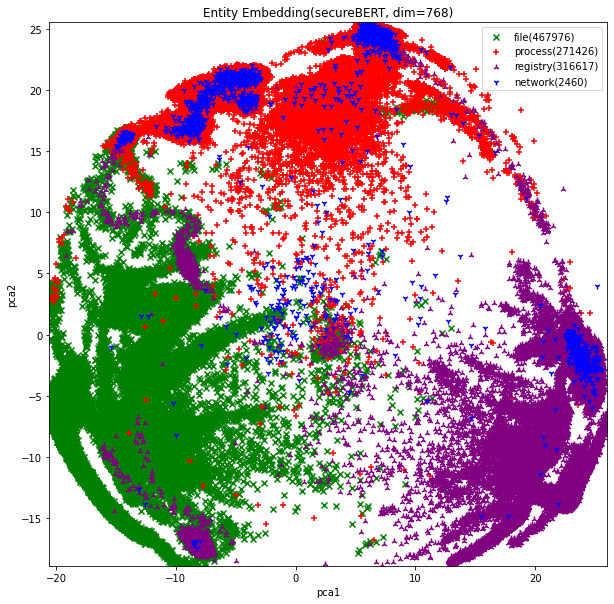

In [8]:
ent_embeddings = np.empty((0, 768), dtype=np.float32)
for filename in sorted(os.listdir(INPUT_EMBEDDING_NAME)):
    if not filename.startswith('embeddings_chunk'):
        continue
    embedding = np.load(f'{INPUT_EMBEDDING_NAME}/{filename}')
    ent_embeddings = np.concatenate((ent_embeddings, embedding), axis=0)
    print(filename, ent_embeddings.shape)
reduced_embedding = dimension_reduce(ent_embeddings)
draw_ent_embedding(reduced_embedding, labels, MODEL_NAME, DIM)

In [9]:
def get_relation_labels(path):
    labels = list()
    with open(path) as f:
        for line in f.readlines()[1:]:
             rel_type, id = line.split('\t')
             labels.append(rel_type)
    return labels

def draw_rel_embedding(X, y, model, dim):
    x1 = X[:, 0]
    x2 = X[:, 1]
    fig, ax = plt.subplots(figsize=(10, 10))
    print_cat = ['file','process','registry','network']
    colors = {'process': 'red', 'file': 'green', 'network': 'blue', 'registry': 'purple'}
    markers = {'process': '+', 'file': 'x', 'network': '1', 'registry': '2'}
    for cat in print_cat:
        flags = [True if l == cat else False for l in y]
        ax.scatter(x1[flags], x2[flags], color=colors[cat], label=f'{cat}({sum(flags)})')
    for i, txt in enumerate(y):
        ax.annotate(y[i], (x1[i], x2[i]))
        
    plt.title(f'Relation Embedding({model}, dim={dim})')
    plt.legend()
    plt.xlabel(f'pca1')
    plt.ylabel(f'pca2')
    plt.show()

(26, 768)
(26, 2)


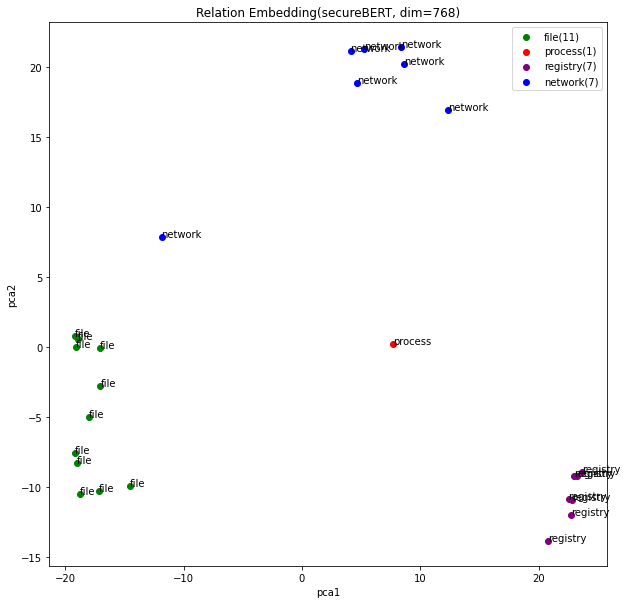

In [10]:
labels = get_relation_labels(INPUT_RELATION_TYPE)
rel_embeddings = np.load(INPUT_RELATION_EMBEDDING_PATH)
reduced_embedding = dimension_reduce(rel_embeddings)
draw_rel_embedding(reduced_embedding, labels, 'secureBERT', 768)